Objective:
The objective of this assignment is to u understand and apply the principles of unsupervised learning using the K-Means clustering algorithm.

Dataset:
You will use the Iris dataset, which contains information about iris flowers, including their sepal length, sepal width, petal length, and petal width. The dataset can be found in the sklearn.datasets module.
We'll use Python and the Scikit-Learn library to build and train our model.
Here’s a step-by-step guide:

In [1]:
!pip install numpy pandas scikit-learn matplotlib

In [8]:
### Step 2: Importing Libraries

#We'll import the necessary libraries for our program:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

Step 3: Creating a Sample Dataset We'll create a simple dataset to work with. Iris dataset, which contains information about iris flowers, including their sepal length, sepal width, petal length, and petal width, as well as their species. This dataset can be found in the sklearn.datasets module.

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
x=iris.data
y=iris.target
# Converting the dataset into a DataFrame
df = pd.DataFrame(x,columns=iris.feature_names)
#print(df)
df.head()

#df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#print(df['species'].value_counts())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Apply the K-Means clustering algorithm to the dataset.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
y_true = iris.target

Optimal
𝐾
K Selection Using the Elbow Method

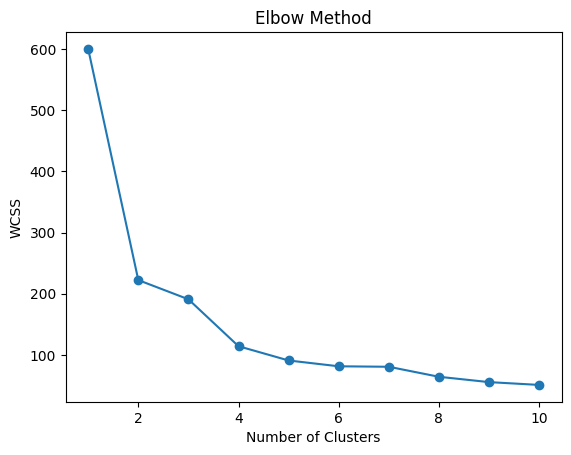

In [20]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Interpretation: The elbow point is observed at
𝐾
=
3
K=3, suggesting that 3 clusters are optimal.

Step 5 :Model Training with K=3

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

Step6: Visualization of Clusters
Cluster Visualization with PCA (2D Projection)

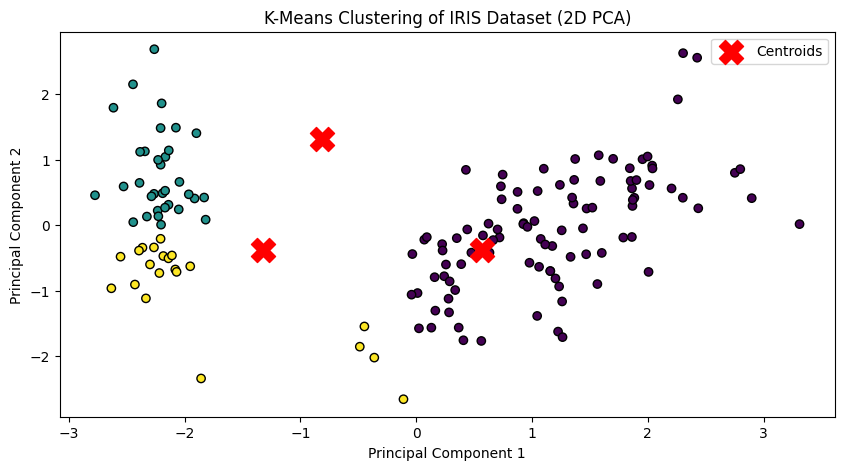

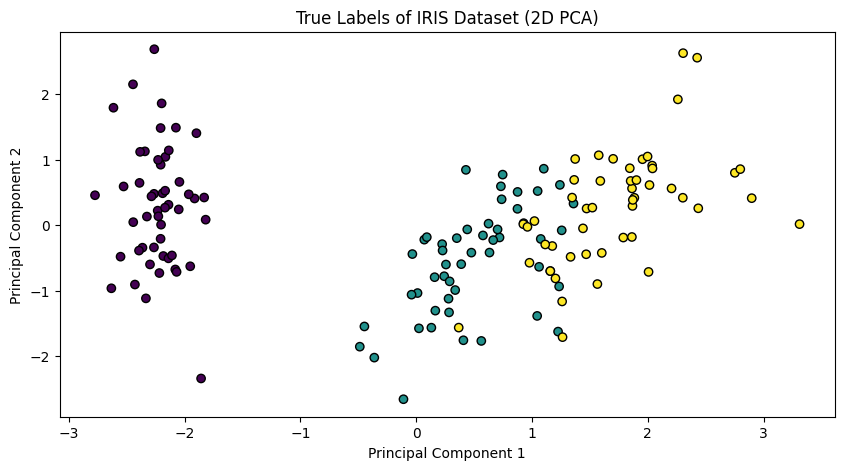

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2 for visualization
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters formed by K-Means
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of IRIS Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plot the true labels for comparison
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', marker='o', edgecolor='k')
plt.title('True Labels of IRIS Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Generating the Confusion Matrix
Since K-Means clustering assigns arbitrary cluster labels, we need to map the clusters to the actual labels for a meaningful comparison.

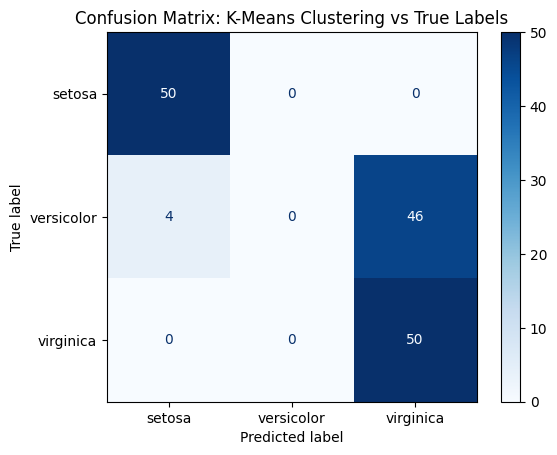

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Map K-Means labels to true labels based on majority vote
from scipy.stats import mode

mapped_labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    mapped_labels[mask] = mode(y_true[mask])[0]

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, mapped_labels)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: K-Means Clustering vs True Labels')
plt.show()

Cluster Visualization:
The K-Means clusters align reasonably well with the actual classes, especially for Setosa, which forms a clearly distinct cluster.
Versicolor and Virginica show some overlap, indicating that these species have more similar feature distributions.

Confusion Matrix Analysis
Diagonal Values: High diagonal values indicate good clustering performance.
Off-Diagonal Values:
Misclassifications primarily occur between Versicolor and Virginica, reflecting their overlapping feature space.
Setosa is perfectly classified due to its distinct feature set.

Result
The K-Means clustering algorithm effectively groups the IRIS dataset into three clusters. While Setosa is perfectly clustered, some confusion between Versicolor and Virginica exists. This result is expected given the similarity in their features. Improving the clustering model with additional feature engineering or using a more sophisticated algorithm like Gaussian Mixture Models could enhance performance.